In [38]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt2

competitions_df = pd.read_feather('../cleaned_data/competitions.feather')
players_df = pd.read_feather('../cleaned_data/players.feather')
games_df = pd.read_feather('../cleaned_data/games.feather')
clubs_df = pd.read_feather('../cleaned_data/clubs.feather')
appearances_df = pd.read_feather('../cleaned_data/appearances.feather')
events_df = pd.read_feather('../cleaned_data/game_events.feather')

# Competitions stats

Visualizzazioni riguardanti le statistiche relative ai principali campionati europei presenti nel dataset:
- statistiche su tutti i campionati europei
- statistiche sui top 5 campionati europei

## Statistiche dei giocatori per ogni campionato

Statistiche che riguardano caratteristiche dei giocatori in base al campionato, come ad esempio età e valore di mercato medi per ogni campionato

In [39]:
top5_leagues = competitions_df.query('competition_id == "L1" or competition_id == "IT1" or competition_id == "ES1" or competition_id == "FR1" or competition_id == "GB1"')

In [40]:
players_competitions = players_df.merge(competitions_df.query('type == "domestic_league"'), left_on='league_id', right_on='domestic_league_code', how='left')

top5_players_competitions = players_competitions[players_competitions['competition_id'].isin(top5_leagues['competition_id'].values)]

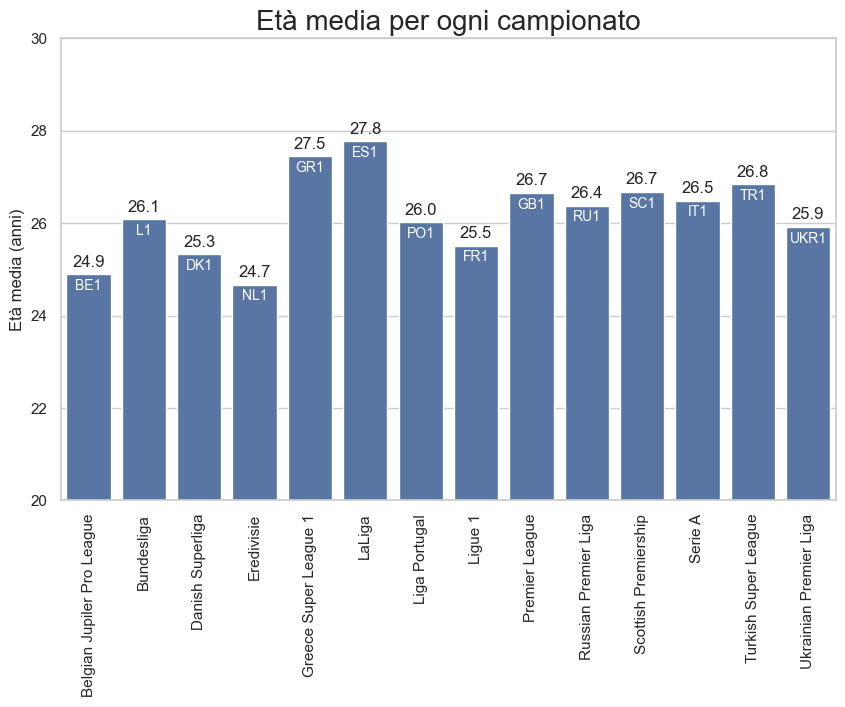

In [41]:
# età media dei calciatori di ogni campionato

avg_age_by_league = players_competitions.groupby(['name', 'domestic_league_code'])['age'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_age_by_league, x='name', y='age')

for index, row in avg_age_by_league.iterrows():
    plt.text(index, row['age']+0.1, f'{row["age"]:.1f}', ha='center', va='bottom', fontsize=12)
    plt.text(index, row['age']-0.1, f'{row["domestic_league_code"]}', ha='center', va='top', fontsize=10, color='white')

plt.ylim(20,30)
plt.title('Età media per ogni campionato', fontsize=20)
plt.xlabel('')
plt.ylabel('Età media (anni)')
plt.xticks(rotation=90)
plt.show()

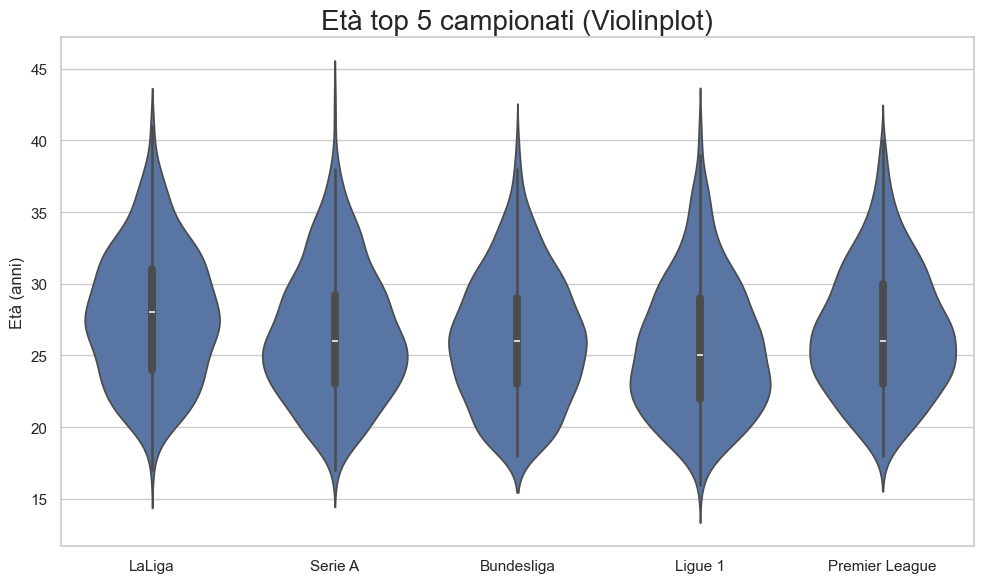

In [42]:
# violin plot delle età medie dei top 5 campionati
plt.figure(figsize=(10, 6))
sns.violinplot(data=top5_players_competitions, x='name', y='age')

plt.title('Età top 5 campionati (Violinplot)', fontsize=20)
plt.xlabel('')
plt.ylabel('Età (anni)')
plt.tight_layout()
plt.show()

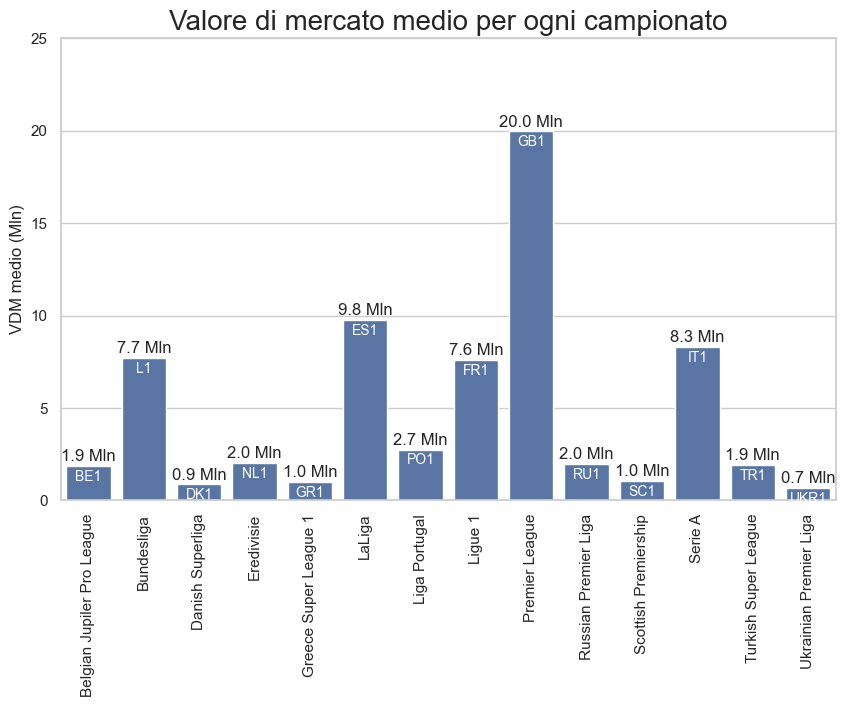

In [43]:
# VDM medio per ogni campionato

avg_vdm_by_league = players_competitions.groupby(['name', 'domestic_league_code'])['market_value_mln'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_vdm_by_league, x='name', y='market_value_mln')

for index, row in avg_vdm_by_league.iterrows():
    plt.text(index, row['market_value_mln']+0.1, f'{row["market_value_mln"]:.1f} Mln', ha='center', va='bottom', fontsize=12)
    plt.text(index, row['market_value_mln']-0.2, f'{row["domestic_league_code"]}', ha='center', va='top', fontsize=10, color='white')

plt.ylim(0,25)
plt.title('Valore di mercato medio per ogni campionato', fontsize=20)
plt.xlabel('')
plt.ylabel('VDM medio (Mln)')
plt.xticks(rotation=90)
plt.show()

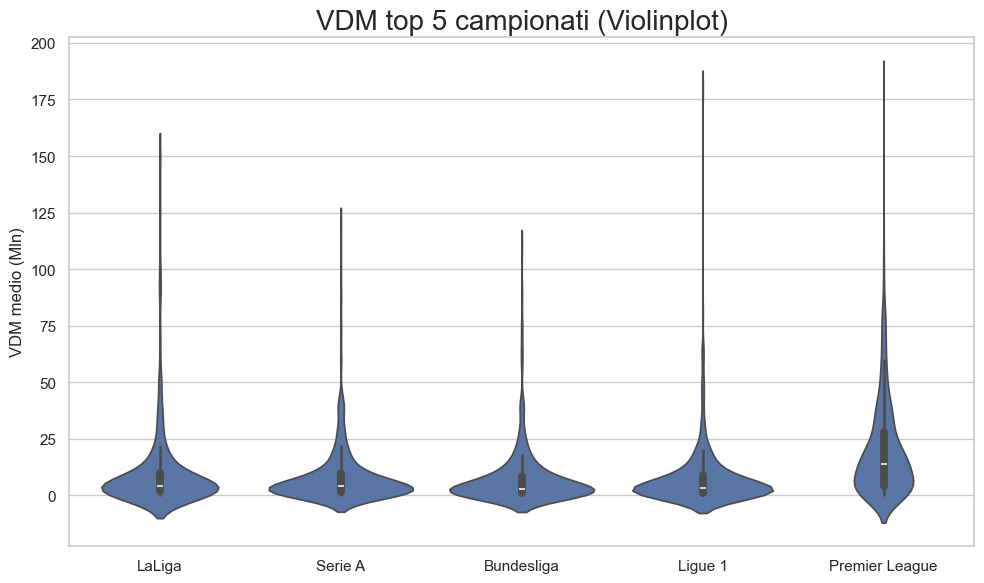

In [44]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=top5_players_competitions, x='name', y='market_value_mln')

plt.title('VDM top 5 campionati (Violinplot)', fontsize=20)
plt.xlabel('')
plt.ylabel('VDM medio (Mln)')
plt.tight_layout()
plt.show()

## Statistiche generali top 5 campionati

Statistiche che confrontano i migliori 5 campionati in base ad altre statistiche, come ad esempio spettatori medi e capienza degli stadi, oppure numero di goal segnati a partita per ogni campionato.

In [45]:
games_competitions = games_df.query('season == 2023').merge(competitions_df.query('type == "domestic_league"'), left_on='competition_id', right_on='competition_id', how='left')

top5_games_competitions = games_competitions[games_competitions['competition_id'].isin(top5_leagues['competition_id'].values)]

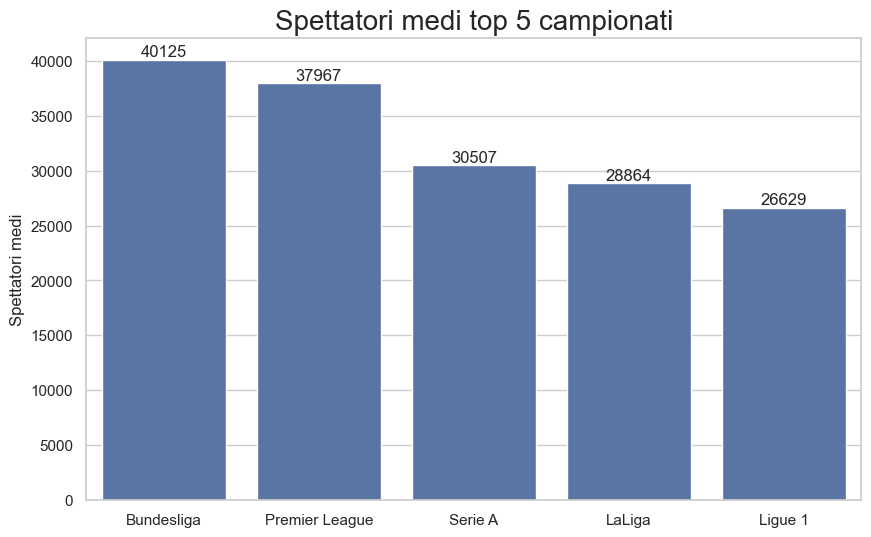

In [46]:
# Spettatori medi top 5 campionati

avg_attendance_by_competition = top5_games_competitions.groupby(['competition_id', 'name'])['attendance'].mean().reset_index().sort_values(by='attendance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_attendance_by_competition, x='name', y='attendance')

# annotazioni del grafico
counter = 0
for index, row in avg_attendance_by_competition.iterrows():
    plt.text(counter, row['attendance'], f'{row["attendance"]:.0f}', ha='center', va='bottom', fontsize=12)
    counter += 1

plt.title('Spettatori medi top 5 campionati', fontsize=20)
plt.xlabel('')
plt.ylabel('Spettatori medi')
plt.show()

In [47]:
clubs_competitions = clubs_df.query('last_season == 2023').merge(competitions_df.query('type == "domestic_league"'), left_on='league_id', right_on='competition_id', how='left')

top5_clubs_competitions = clubs_competitions[clubs_competitions['league_id'].isin(top5_leagues['competition_id'].values)]

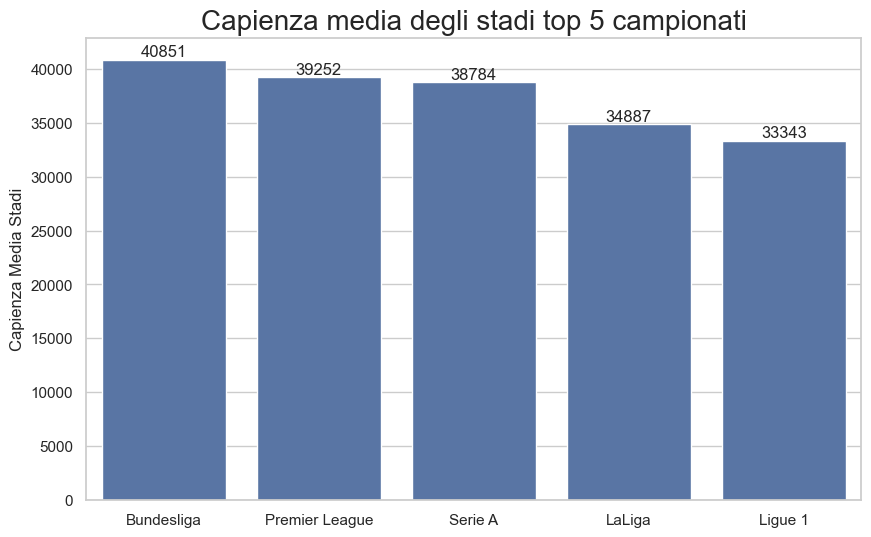

In [48]:
# Capienza media degli stadi nei top 5 campionati

avg_capacity_by_league = top5_clubs_competitions.groupby(['league_id', 'name'])['stadium_seats'].mean().reset_index()
avg_capacity_by_league = avg_capacity_by_league.sort_values(by='stadium_seats', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_capacity_by_league, x='name', y='stadium_seats')

# annotazioni del grafico
counter = 0
for index, row in avg_capacity_by_league.iterrows():
    plt.text(counter, row['stadium_seats'], f'{row["stadium_seats"]:.0f}', ha='center', va='bottom', fontsize=12)
    counter += 1
    
plt.title('Capienza media degli stadi top 5 campionati', fontsize=20)
plt.xlabel('')
plt.ylabel('Capienza Media Stadi')
plt.show()

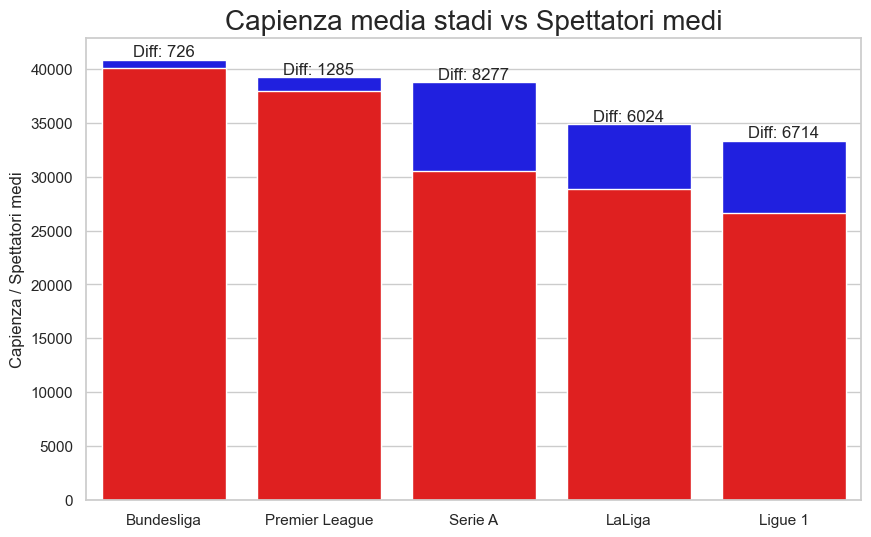

In [49]:
# Spettatori medi rispetto alla Capienza media degli stadi (top 5 campionati)

plt.figure(figsize=(10, 6))

ax1 = sns.barplot(data=avg_capacity_by_league, x='name', y='stadium_seats', color='blue')
ax2 = sns.barplot(data=avg_attendance_by_competition, x='name', y='attendance', color='red')

# annotazione della differenza tra capienza e spettatori medi
for idx, (cap, att) in enumerate(zip(avg_capacity_by_league['stadium_seats'], avg_attendance_by_competition['attendance'])):
    diff = cap - att
    ax1.text(idx, cap, f'Diff: {diff:.0f}', ha='center', va='bottom', fontsize=12)
    

plt.title('Capienza media stadi vs Spettatori medi', fontsize=20)
plt.ylabel('Capienza / Spettatori medi')
plt.xlabel('')
plt.show()

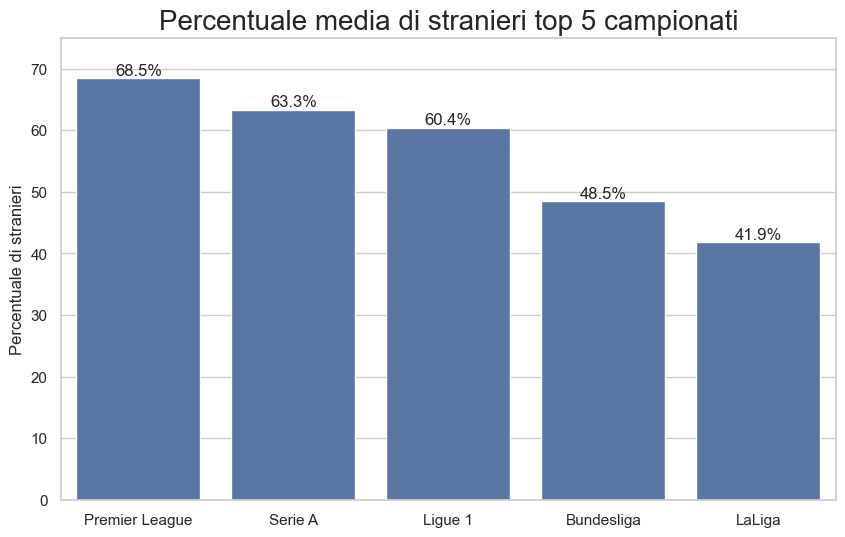

In [50]:
# percentuale di stranieri per ogni campionato

avg_foreigners_by_league = top5_clubs_competitions.groupby(['league_id', 'name'])['foreigners_percentage'].mean().reset_index()
avg_foreigners_by_league = avg_foreigners_by_league.sort_values(by='foreigners_percentage', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(data=avg_foreigners_by_league, x='name', y='foreigners_percentage')

# annotazioni del grafico
counter = 0
for index, row in avg_foreigners_by_league.iterrows():
    plt.text(counter, row['foreigners_percentage'], f'{row["foreigners_percentage"]:.1f}%', ha='center', va='bottom', fontsize=12)
    counter += 1
    
plt.title('Percentuale media di stranieri top 5 campionati', fontsize=20)
plt.xlabel('')
plt.ylabel('Percentuale di stranieri')
plt.ylim(0,75)
plt.show()

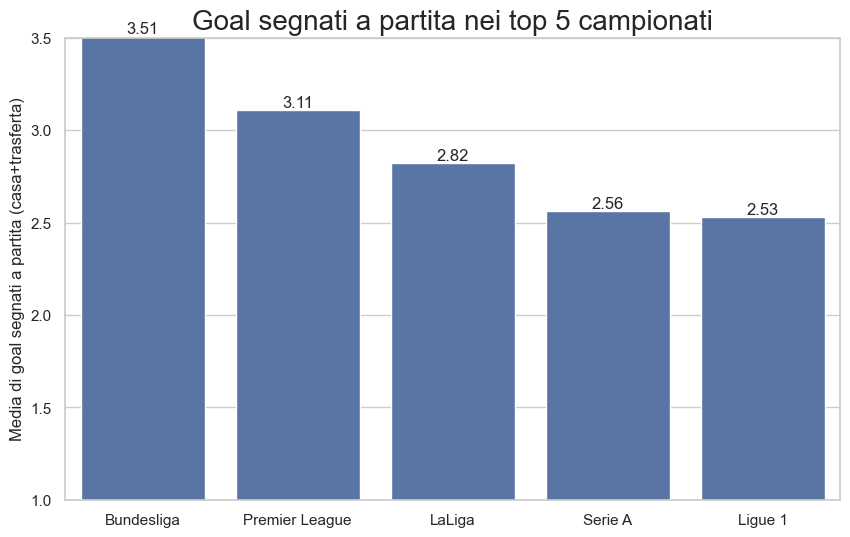

In [51]:
# Crea una copia del DataFrame per evitare il warning
top5_games_competitions = top5_games_competitions.copy()

top5_games_competitions['total_goals'] = top5_games_competitions['home_club_goals'] + top5_games_competitions['away_club_goals']

avg_goals_per_game = top5_games_competitions.groupby(['competition_id', 'name'])['total_goals'].mean().reset_index(name='avg_goals').sort_values(by='avg_goals', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(data=avg_goals_per_game, x='name', y='avg_goals')

# annotazioni del grafico
counter = 0
for index, row in avg_goals_per_game.iterrows():
    plt.text(counter, row['avg_goals'], f'{row["avg_goals"]:.2f}', ha='center', va='bottom', fontsize=12)
    counter += 1
    
plt.ylim(1,3.5)
plt.title('Goal segnati a partita nei top 5 campionati', fontsize=20)
plt.xlabel('')
plt.ylabel('Media di goal segnati a partita (casa+trasferta)')
plt.show()

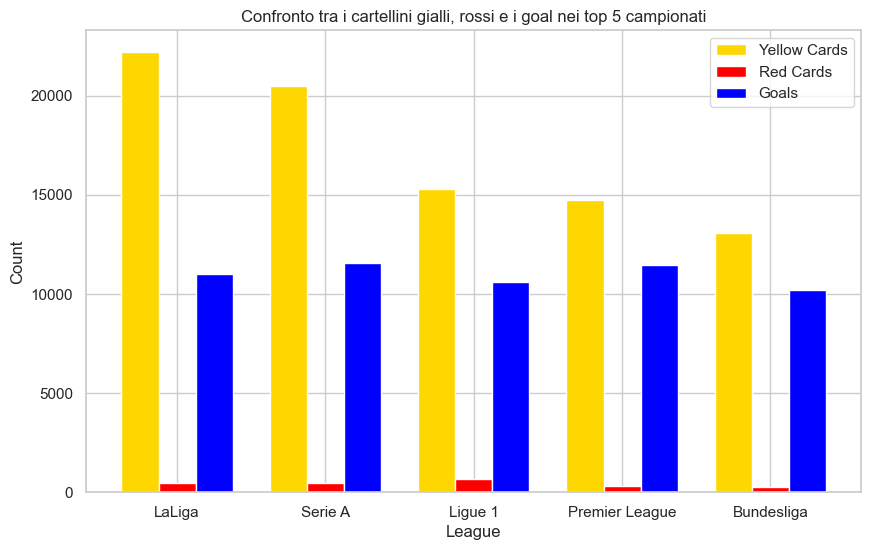

In [52]:
filtered_appearances = appearances_df[appearances_df['competition_id'].isin(['L1', 'IT1', 'ES1', 'FR1', 'GB1'])]


stats_by_league = filtered_appearances.groupby('competition_id').agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'goals': 'sum'
}).reset_index()

stats_by_name = stats_by_league.merge(competitions_df, left_on='competition_id', right_on='competition_id', how='left')


stats_by_name = stats_by_name.rename(columns = {
    'name': 'League',
    'yellow_cards': 'Yellow Cards',
    'red_cards': 'Red Cards',
    'goals': 'Goals'
})

stats_by_name = stats_by_name.sort_values(by='Yellow Cards', ascending=False)



sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

bar_width = 0.25  # larghezza delle barre

# Calcola le posizioni delle barre
bar1 = range(len(stats_by_name))
bar2 = [i + bar_width for i in bar1]
bar3 = [i + bar_width for i in bar2]

# Plotta le barre sovrapposte
plt.bar(bar1, stats_by_name['Yellow Cards'], width=bar_width, color='gold', label='Yellow Cards')
plt.bar(bar2, stats_by_name['Red Cards'], width=bar_width, color='red', label='Red Cards')
plt.bar(bar3, stats_by_name['Goals'], width=bar_width, color='blue', label='Goals')

plt.xticks([r + bar_width for r in range(len(stats_by_name))], stats_by_name['League'])


plt.legend()

plt.title('Confronto tra i cartellini gialli, rossi e i goal nei top 5 campionati')
plt.xlabel('League')
plt.ylabel('Count')

# Mostra il plot
plt.show()

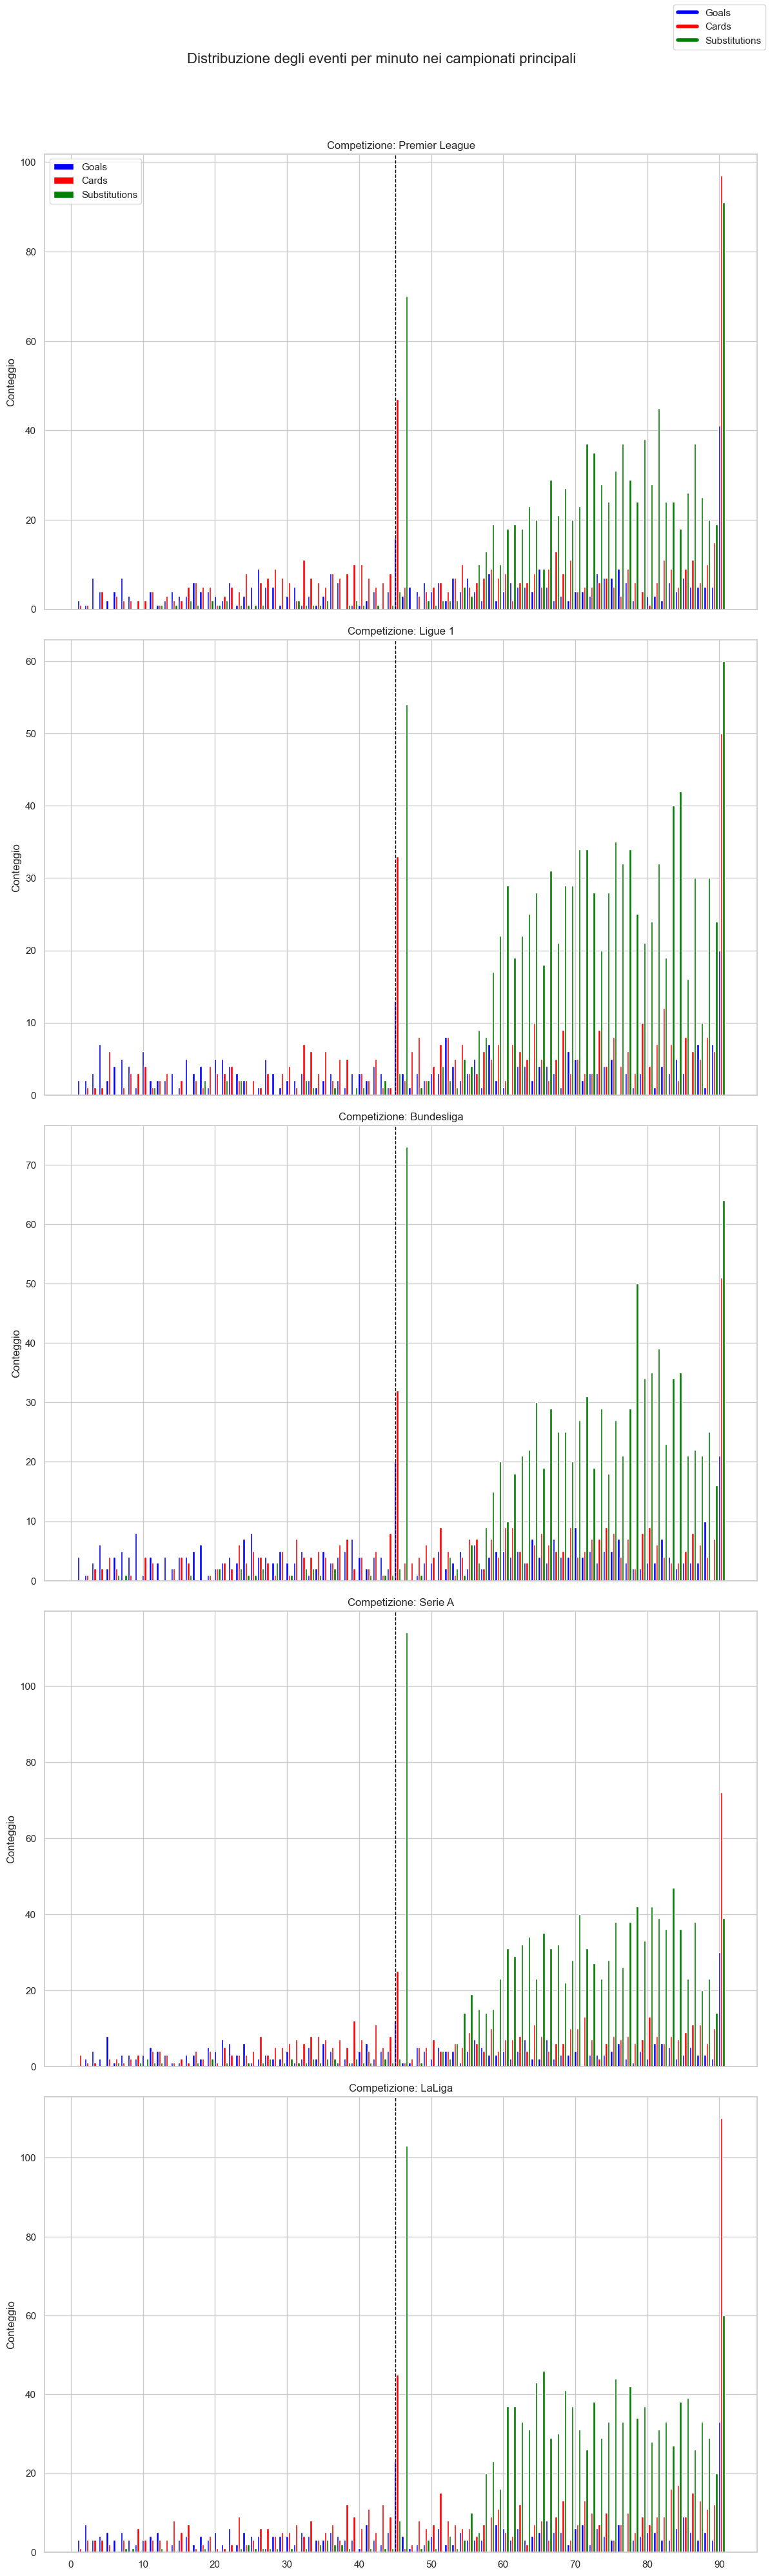

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from config import folder_path

# Leggi i dati
games_df = pd.read_csv(f"{folder_path}/games.csv")

top_leagues = ['L1', 'IT1', 'ES1', 'FR1', 'GB1']

# Unisci i DataFrame
events_competitions_df = events_df.merge(games_df, on='game_id', how='left')
events_competitions_names = events_competitions_df.merge(
    competitions_df[['competition_id', 'name']],
    on='competition_id',
    how='left'
)

# Filtra per la stagione 2023 e i campionati principali
events_filtered_df = events_competitions_names[(events_competitions_names['season'] == 2023) & 
                                               (events_competitions_names['competition_id'].isin(top_leagues))]

# Aggrega i dati
aggregated_data = events_filtered_df.groupby(['name', 'minute', 'type']).size().reset_index(name='count')

comp_names = events_filtered_df['name'].unique()

# Crea il grafico a barre
fig, axes = plt.subplots(len(comp_names), 1, figsize=(12, 40), sharex=True)
fig.suptitle('Distribuzione degli eventi per minuto nei campionati principali', fontsize=16)

# Definisci i colori per ogni tipo di evento
colors = {'Goals': 'blue', 'Cards': 'red', 'Substitutions': 'green'}
event_types = list(colors.keys())

# Definisci larghezza delle barre e offset
bar_width = 0.3
offsets = [0, bar_width, 2 * bar_width]

for i, competition in enumerate(comp_names):
    ax = axes[i]
    
    # Filtra i dati per il campionato attuale
    comp_data = aggregated_data[aggregated_data['name'] == competition]
    
    # Crea barre separate per ogni tipo di evento
    for j, event_type in enumerate(event_types):
        event_data = comp_data[comp_data['type'] == event_type]
        ax.bar(event_data['minute'] + offsets[j], event_data['count'], 
               color=colors[event_type], label=event_type, width=bar_width)

    ax.axvline(x=45, color='black', linestyle='--', linewidth=1)
    ax.set_title(f'Competizione: {competition}')
    ax.set_ylabel('Conteggio')
    ax.set_xticks(range(0, 91, 10))
    ax.set_xticklabels(range(0, 91, 10))
    
    # Aggiungi la legenda solo nel primo grafico
    if i == 0:
        ax.legend()

# Crea la legenda
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
fig.legend(handles, colors.keys(), loc='upper right')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
